In [2]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
# 데이터 불러오기
corolla = pd.read_csv("ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
## 데이터의 수 확인하기(행의 수)
nCar = corolla.shape[0]

## 변수의 수 확인하기(열의 수)
nVar = corolla.shape[1]

print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 1436 nVar: 37


## 범주형 변수를 이진형 변수로 변환

In [5]:
##데이터 타입 확인하기
corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [6]:
## 여기서는  3개의 변수로 이루어져있다.
## 이 변수들을 명목형 변수로 변환하려면, 변수-1개의 값이 필요하다!
## 여기서는 2개가 필요하지만, 간단하게 하기 위해서 여기서는 3개 생성한다!

In [7]:
# 가변수 생성
dummy_p = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

In [8]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
# 연료타입에 대한 위치 인덱스를 저장(이라는데.. 이 단계는 무슨 단계인걸까요..?) 
p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

In [10]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [11]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
dummy_p[p_idx] = 1  # Petrol
dummy_d[d_idx] = 1  # Diesel
dummy_c[c_idx] = 1  # CNG

In [12]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

## 불필요한 변수 제거 및 가변수 추가


In [13]:
## 위에서 만든 더미 변수를 하나로 합치기

# np or dict to DF
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})

In [14]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [15]:
# 이미 있는 'Id','Model','Fuel_Type' 제거하고, pd.concat으로 위에서 생성한 Fuel_df 합치기
corolla_ = corolla.dropna().drop(['Id','Model','Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla_, Fuel), 1)

In [16]:
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [17]:
# 상수항(bias) 추가
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [19]:
## 원하는 변수들 확인해보기(price가 아닌 변수들 추출)
mlr_data.columns.difference(['Price'])

Index(['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic',
       'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider',
       'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders',
       'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color',
       'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps',
       'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio',
       'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const'],
      dtype='object')

In [20]:
feature_columns = list(mlr_data.columns.difference(['Price']))
X = mlr_data[feature_columns] ## 'Price'가 아닌 값들을 list로 묶어서 X변수에
y = mlr_data.Price ## Price를 y변수에
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3) ## 비율은 7:3으로 분할
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [21]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [22]:
fitted_full_model.summary() ## R2가 높고, 대부분의 변수들이 유의

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     326.4
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:22:37   Log-Likelihood:                -8397.8
No. Observations:                1005   AIC:                         1.686e+04
Df Residuals:                     971   BIC:                         1.703e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -410.2504    129.410     -3.170      0.002    -664.205    -156.296
Age_08_04         -117.8388      3.957    -29.781      0.000    -125.604    -110.074
Airbag_1             2.2866    264.453      0.009      0.993    -516.679     521.252
Airbag_2            -2.7834    133.782     -0.021      0.983    -265.318     259.751
Airco              295.1600     90.767      3.252      0.001     117.039     473.281
Automatic          384.2552    152.865      2.514      0.012      84.272     684.238
Automatic_airco   2275.9313    194.724     11.688      0.000    1893.802    2658.060
BOVAG_Guarantee    482.2281    131.498      3.667      0.000     224.174     740.282
Backseat_Divider   -67.9252    130.661     -0.520      0.603    -324.335     188.485
Boardcomputer     -289.6157    117.628     -2.462      0.014    -520.451     -58.781
CD_Player          232.3746     98.350      2.363      0.018      39.371     425.378
CNG              -1808.6860    247.748     -7.301      0.000   -2294.869   -1322.503
Central_Lock        -1.2008    141.482     -0.008      0.993    -278.847     276.445
Cylinders           -0.0313      0.002    -12.597      0.000      -0.036      -0.026
Diesel            1429.4142    327.758      4.361      0.000     786.218    2072.610
Doors               51.4354     42.660      1.206      0.228     -32.281     135.152
Gears               -0.6414    202.000     -0.003      0.997    -397.049     395.766
Guarantee_Period    72.7080     14.190      5.124      0.000      44.862     100.554
HP                  46.4549      5.971      7.780      0.000      34.737      58.173
KM                  -0.0141      0.001    -10.768      0.000      -0.017      -0.012
Met_Color           48.0494     75.540      0.636      0.525    -100.192     196.291
Metallic_Rim        89.4246     95.196      0.939      0.348     -97.389     276.238
Mfg_Month         -100.8623     10.391     -9.707      0.000    -121.254     -80.471
Mfg_Year             2.5401      0.994      2.555      0.011       0.589       4.491
Mfr_Guarantee      213.6263     73.613      2.902      0.004      69.168     358.085
Mistlamps           -1.4518    110.706     -0.013      0.990    -218.703     215.799
Petrol             379.2640    247.865      1.530      0.126    -107.149     865.677
Power_Steering      16.3782    288.150      0.057      0.955    -549.091     581.847
Powered_Windows    377.8642    141.248      2.675      0.008     100.678     655.050
Quarterly_Tax       13.8691      1.925      7.206      0.000      10.092      17.646
Radio              515.7287    623.482      0.827      0.408    -707.799    1739.256
Radio_cassette    -665.1433    622.907     -1.068      0.286   -1887.542     557.255
Sport_Model        338.0703     87.903      3.846      0.000     165.568     510.572
Tow_Bar           -153.

In [23]:
## R-squared = 0.917로 유의하고
## 많은 변수들도 유의하지만, 다중공선성 확인할 필요 있음!

## VIF를 통한 다중공선성 확인 

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

c:\users\main\appdata\local\programs\python\python39\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\main\appdata\local\programs\python\python39\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


In [25]:
## VIF값을 보면 다중공선성이 심한것 같지만, 위의 회귀모델에 적합했을 때 유의한 걸로 나왔으면,
## 굳이 해당 변수를 제거하지는 않는다.

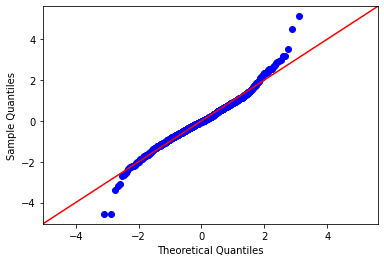

In [26]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid  # residual
pred_y=fitted_full_model.predict(train_x)
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

In [27]:
## 꼬리부분의 상단 2개 데이터가 살짝 벗어나 있지만,
## 해당 선형 회귀가 어느정도 잘 맞는다고 볼 수 있다.

Text(0, 0.5, 'Residual')

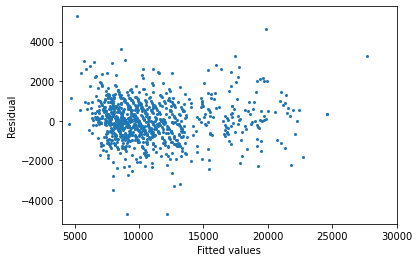

In [30]:
# residual pattern 확인
pred_y=fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [31]:
## 검증 데이터에 대한 예측 
pred_y2=fitted_full_model.predict(test_x) 

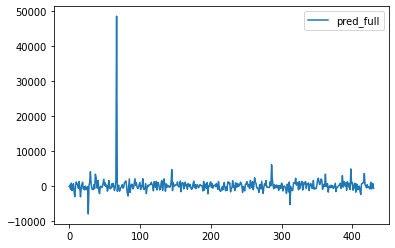

In [32]:
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

In [33]:
## 검증데이터에 대해서 어느 정도 잘 맞는다,
## 높게 솟은 저 부분 제외하고!

In [34]:
## MSE 값 확인하기
from sklearn.metrics import mean_squared_error

In [36]:
 mean_squared_error(y_true= test_y, y_pred= pred_y2)

6865080.029741953

## 변수선택법

In [37]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
## feature_columns[0:5]에 대한 feature를 받아서,  AIC반환
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F2553399D0>, 'AIC': 19055.980007810613}


In [39]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1f25a789bb0>,
 'AIC': 16863.652709886548}

In [40]:
## 이해가... 시간이 필요..!
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 1.1876111030578613 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                             17452.3672
Name: 211, dtype: object


In [41]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [42]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.06250500679016113 seconds.
Processed  630 models on 2 predictors in 1.2032201290130615 seconds.
Processed  7140 models on 3 predictors in 10.719574689865112 seconds.
Total elapsed time: 12.141557931900024 seconds.


In [43]:
models

,AIC,model
1,17738.516158,<statsmodels.regression.linear_model.Regressio...
2,17452.367200,<statsmodels.regression.linear_model.Regressio...
3,17336.148721,<statsmodels.regression.linear_model.Regressio...


In [44]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     2042.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:41:10   Log-Likelihood:                -8664.1
No. Observations:                1005   AIC:                         1.734e+04
Df Residuals:                    1001   BIC:                         1.736e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Automatic_airco  3465.9392    211.986     16.350      0.000    3049.952    3881.926
HP                 32.5462      2.912     11.178      0.000      26.833      38.260
Mfg_Year         1771.8366     30.695     57.724      0.000    1711.602    1832.071
const           -3.536e+06   6.14e+04    -57.626      0.000   -3.66e+06   -3.42e+06
==============================================================================
Omnibus:                       88.620   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.816
Skew:                           0.125   Prob(JB):                    3.57e-108
Kurtosis:                       6.428   Cond. No.                     2.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
## 변수 3개를 넣은 것 치고 굉장히 높은 R-squared: 0.860

In [48]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91730
full model AIC:  16863.65271
full model MSE:  12836018.27602
selected model Rsquared:  0.85952
selected model AIC:  17336.14872
selected model MSE:  12836018.27602


Text(0, 0.5, 'BIC')

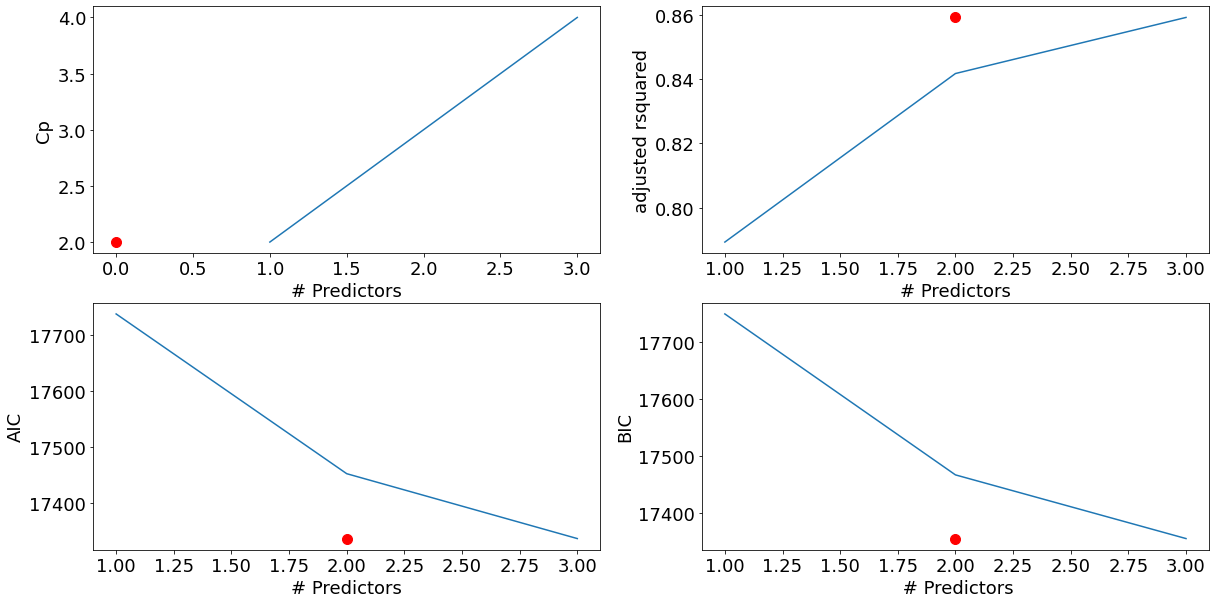

In [49]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp(sse값을 가지고 만든 성능 지표)
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

In [51]:
##R-squared 제외하고 모두 낮을 수록 좋다.

# 전진선택법

In [52]:
##전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time() ## 어떤 역할..?일까요..?
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [53]:
## 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [55]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.09375715255737305
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F25AA2EBB0>
Processed  35 models on 2 predictors in 0.07813334465026855
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F25AA2EF70>
Processed  34 models on 3 predictors in 0.06250691413879395
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F25AA13A00>
Processed  33 models on 4 predictors in 0.07812619209289551
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F25AA18550>
Processed  32 models on 5 predictors in 0.07811570167541504
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP'

In [56]:
Forward_best_model.aic

16845.77907211801

In [57]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     492.9
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:48:32   Log-Likelihood:                -8399.9
No. Observations:                1005   AIC:                         1.685e+04
Df Residuals:                     982   BIC:                         1.696e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1206.0519    122.853      9.817      0.000     964.967    1447.136
Automatic_airco   2274.1109    181.889     12.503      0.000    1917.176    2631.046
HP                  45.6312      5.429      8.405      0.000      34.978      56.285
Weight              11.4656      1.331      8.614      0.000       8.854      14.078
KM                  -0.0140      0.001    -10.891      0.000      -0.017      -0.011
Powered_Windows    393.6497     82.125      4.793      0.000     232.488     554.811
BOVAG_Guarantee    482.9673    126.061      3.831      0.000     235.587     730.347
Guarantee_Period    77.2034     13.009      5.935      0.000      51.675     102.732
Quarterly_Tax       13.7278      1.768      7.767      0.000      10.259      17.196
Petrol            2191.1034    354.642      6.178      0.000    1495.160    2887.046
Sport_Model        300.8136     79.754      3.772      0.000     144.307     457.321
ABS               -403.0954     96.538     -4.176      0.000    -592.539    -213.651
Mfr_Guarantee      216.4619     71.556      3.025      0.003      76.041     356.883
Airco              309.9388     86.245      3.594      0.000     140.693     479.185
cc                  -3.3103      0.522     -6.338      0.000      -4.335      -2.285
Diesel            3137.3518    494.029      6.351      0.000    2167.878    4106.825
CD_Player          249.7091     96.055      2.600      0.009      61.212     438.206
Boardcomputer     -318.1280    113.773     -2.796      0.005    -541.394     -94.862
Automatic          347.3763    149.222      2.328      0.020      54.545     640.207
Tow_Bar           -135.4900     78.193     -1.733      0.083    -288.934      17.954
Age_08_04          -17.2831     10.280     -1.681      0.093     -37.456       2.890
Radio_cassette    -142.8911    100.692     -1.419      0.156    -340.488      54.706
const            -2.415e+06   2.46e+05     -9.814      0.000    -2.9e+06   -1.93e+06
==============================================================================
Omnibus:                       63.511   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.128
Skew:                           0.210   Prob(JB):                     1.93e-47
Kurtosis:                       5.227   Cond. No.                     5.72e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 후진소거법

In [60]:
## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [61]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1): ## predictor가 2개 이상이면 계속 반복하도록 하는  while문
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [62]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.23441171646118164
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F25DC1D670>
Processed  35 models on 34 predictors in 0.2500288486480713
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mf

In [63]:
Backward_best_model.aic

16845.779072117988

# 단계적 선택법

In [64]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [65]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.06250929832458496
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F25DC16310>
forward
Processed  1 models on 0 predictors in 0.0
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F25DC20E50>
Processed  35 models on 2 predictors in 0.06252455711364746
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F25DC16D00>
forward
Processed  2 models on 1 predictors in 0.015603065490722656
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F25AA3CCD0>
Processed  34 models on 3 predictors in 0.06251025199890137
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWr

Processed  16 models on 15 predictors in 0.09375596046447754
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Sport_Model', 'ABS', 'Airco', 'cc', 'Diesel', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F25DC07880>
Processed  20 models on 17 predictors in 0.14063596725463867
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Sport_Model', 'ABS', 'Mfr_Guarantee', 'Airco', 'cc', 'Diesel', 'CD_Player', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F25DC1EA00>
forward
Processed  17 models on 16 predictors in 0.09375929832458496
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', '

Processed  14 models on 23 predictors in 0.07814359664916992
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Sport_Model', 'ABS', 'Mfr_Guarantee', 'Airco', 'cc', 'Diesel', 'CD_Player', 'Boardcomputer', 'Automatic', 'Tow_Bar', 'Age_08_04', 'Radio_cassette', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F25DC01B50>
forward
Processed  23 models on 22 predictors in 0.12499427795410156
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Sport_Model', 'ABS', 'Mfr_Guarantee', 'Airco', 'cc', 'Diesel', 'CD_Player', 'Boardcomputer', 'Automatic', 'Tow_Bar', 'Age_08_04', 'Radio_cassette', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F25DC28340>
backward
Processed  14 models o

backward
Processed  14 models on 23 predictors in 0.06250643730163574
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Sport_Model', 'ABS', 'Mfr_Guarantee', 'Airco', 'cc', 'Diesel', 'CD_Player', 'Boardcomputer', 'Automatic', 'Tow_Bar', 'Age_08_04', 'Radio_cassette', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F209508790>
forward
Processed  23 models on 22 predictors in 0.10938215255737305
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Sport_Model', 'ABS', 'Mfr_Guarantee', 'Airco', 'cc', 'Diesel', 'CD_Player', 'Boardcomputer', 'Automatic', 'Tow_Bar', 'Age_08_04', 'Radio_cassette', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F25DC28B80>
backward
Processed  14

In [66]:
Stepwise_best_model.aic

16845.77907211801

# 성능평가 

In [67]:
# the number of parameters

print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(23,) (25,) (23,)


In [69]:
## 전진선택법에서 선택된 변수들
Forward_best_model.model.exog_names

['Mfg_Year',
 'Automatic_airco',
 'HP',
 'Weight',
 'KM',
 'Powered_Windows',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'Quarterly_Tax',
 'Petrol',
 'Sport_Model',
 'ABS',
 'Mfr_Guarantee',
 'Airco',
 'cc',
 'Diesel',
 'CD_Player',
 'Boardcomputer',
 'Automatic',
 'Tow_Bar',
 'Age_08_04',
 'Radio_cassette',
 'const']

In [70]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [71]:
## 빈 df만들기
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [72]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [73]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

                 ALL         FORWARD      BACKWARD        STEPWISE
MSE   6865080.029742  6731501.569702  6731501.5697  6731501.569702
RMSE     2620.129773     2594.513744   2594.513744     2594.513744
MAE       951.027586      956.653584    956.653584      956.653584
MAPE        8.836183        8.906969      8.906969        8.906969


In [74]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
23
25
23


In [75]:
## 비슷한 값을 갖는다면, 변수의 개수가 더 적은 변수 선택법이 제일 best!

In [76]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     326.4
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:59:51   Log-Likelihood:                -8397.8
No. Observations:                1005   AIC:                         1.686e+04
Df Residuals:                     971   BIC:                         1.703e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -410.2504    129.410     -3.170      0.002    -664.205    -156.296
Age_08_04         -117.8388      3.957    -29.781      0.000    -125.604    -110.074
Airbag_1             2.2866    264.453      0.009      0.993    -516.679     521.252
Airbag_2            -2.7834    133.782     -0.021      0.983    -265.318     259.751
Airco              295.1600     90.767      3.252      0.001     117.039     473.281
Automatic          384.2552    152.865      2.514      0.012      84.272     684.238
Automatic_airco   2275.9313    194.724     11.688      0.000    1893.802    2658.060
BOVAG_Guarantee    482.2281    131.498      3.667      0.000     224.174     740.282
Backseat_Divider   -67.9252    130.661     -0.520      0.603    -324.335     188.485
Boardcomputer     -289.6157    117.628     -2.462      0.014    -520.451     -58.781
CD_Player          232.3746     98.350      2.363      0.018      39.371     425.378
CNG              -1808.6860    247.748     -7.301      0.000   -2294.869   -1322.503
Central_Lock        -1.2008    141.482     -0.008      0.993    -278.847     276.445
Cylinders           -0.0313      0.002    -12.597      0.000      -0.036      -0.026
Diesel            1429.4142    327.758      4.361      0.000     786.218    2072.610
Doors               51.4354     42.660      1.206      0.228     -32.281     135.152
Gears               -0.6414    202.000     -0.003      0.997    -397.049     395.766
Guarantee_Period    72.7080     14.190      5.124      0.000      44.862     100.554
HP                  46.4549      5.971      7.780      0.000      34.737      58.173
KM                  -0.0141      0.001    -10.768      0.000      -0.017      -0.012
Met_Color           48.0494     75.540      0.636      0.525    -100.192     196.291
Metallic_Rim        89.4246     95.196      0.939      0.348     -97.389     276.238
Mfg_Month         -100.8623     10.391     -9.707      0.000    -121.254     -80.471
Mfg_Year             2.5401      0.994      2.555      0.011       0.589       4.491
Mfr_Guarantee      213.6263     73.613      2.902      0.004      69.168     358.085
Mistlamps           -1.4518    110.706     -0.013      0.990    -218.703     215.799
Petrol             379.2640    247.865      1.530      0.126    -107.149     865.677
Power_Steering      16.3782    288.150      0.057      0.955    -549.091     581.847
Powered_Windows    377.8642    141.248      2.675      0.008     100.678     655.050
Quarterly_Tax       13.8691      1.925      7.206      0.000      10.092      17.646
Radio              515.7287    623.482      0.827      0.408    -707.799    1739.256
Radio_cassette    -665.1433    622.907     -1.068      0.286   -1887.542     557.255
Sport_Model        338.0703     87.903      3.846      0.000     165.568     510.572
Tow_Bar           -153.

In [77]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     492.9
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:00:01   Log-Likelihood:                -8399.9
No. Observations:                1005   AIC:                         1.685e+04
Df Residuals:                     982   BIC:                         1.696e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1206.0519    122.853      9.817      0.000     964.967    1447.136
Automatic_airco   2274.1109    181.889     12.503      0.000    1917.176    2631.046
HP                  45.6312      5.429      8.405      0.000      34.978      56.285
Weight              11.4656      1.331      8.614      0.000       8.854      14.078
KM                  -0.0140      0.001    -10.891      0.000      -0.017      -0.011
Powered_Windows    393.6497     82.125      4.793      0.000     232.488     554.811
BOVAG_Guarantee    482.9673    126.061      3.831      0.000     235.587     730.347
Guarantee_Period    77.2034     13.009      5.935      0.000      51.675     102.732
Quarterly_Tax       13.7278      1.768      7.767      0.000      10.259      17.196
Petrol            2191.1034    354.642      6.178      0.000    1495.160    2887.046
Sport_Model        300.8136     79.754      3.772      0.000     144.307     457.321
ABS               -403.0954     96.538     -4.176      0.000    -592.539    -213.651
Mfr_Guarantee      216.4619     71.556      3.025      0.003      76.041     356.883
Airco              309.9388     86.245      3.594      0.000     140.693     479.185
cc                  -3.3103      0.522     -6.338      0.000      -4.335      -2.285
Diesel            3137.3518    494.029      6.351      0.000    2167.878    4106.825
CD_Player          249.7091     96.055      2.600      0.009      61.212     438.206
Boardcomputer     -318.1280    113.773     -2.796      0.005    -541.394     -94.862
Automatic          347.3763    149.222      2.328      0.020      54.545     640.207
Tow_Bar           -135.4900     78.193     -1.733      0.083    -288.934      17.954
Age_08_04          -17.2831     10.280     -1.681      0.093     -37.456       2.890
Radio_cassette    -142.8911    100.692     -1.419      0.156    -340.488      54.706
const            -2.415e+06   2.46e+05     -9.814      0.000    -2.9e+06   -1.93e+06
==============================================================================
Omnibus:                       63.511   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.128
Skew:                           0.210   Prob(JB):                     1.93e-47
Kurtosis:                       5.227   Cond. No.                     5.72e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
## qustn
#1 데이터 전처리
#2 상수항 추가
#3 R2또는  P-value 보고 모델의 성능 파악
#4 공분산이나 VIF값 확인해서 다중공선성 확인
#5 잔차 확인 (잘 적합 되었는가..?)

# 로지스틱 회귀분석

In [79]:
# 분석에 필요한 패키지 불러오기
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time

In [80]:
## 데이터 불러오기

ploan = pd.read_csv("Personal Loan.csv")
ploan
'''
Experience 경력
Income 수입
Famliy 가족단위
CCAvg 월 카드사용량 
Education 교육수준 (1: undergrad; 2, Graduate; 3; Advance )
Mortgage 가계대출
Securities account 유가증권계좌유무
CD account 양도예금증서 계좌 유무
Online 온라인계좌유무
CreidtCard 신용카드유무 

** 해당 변수들을 가지고 로지스틱 회귀분석을 통해 대출을 할지, 말지를 결정
'''

'\nExperience 경력\nIncome 수입\nFamliy 가족단위\nCCAvg 월 카드사용량 \nEducation 교육수준 (1: undergrad; 2, Graduate; 3; Advance )\nMortgage 가계대출\nSecurities account 유가증권계좌유무\nCD account 양도예금증서 계좌 유무\nOnline 온라인계좌유무\nCreidtCard 신용카드유무 \n\n'

In [82]:
# 의미없는 변수 제거
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'], axis=1, inplace=False)
ploan_processed

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,46,22,70,4,1.9,1,212,0,0,0,0,1
2496,63,37,32,3,0.7,2,141,0,0,0,0,0
2497,33,9,14,3,0.9,3,114,0,0,0,0,0
2498,38,14,111,2,6.1,1,326,0,0,0,0,0


In [83]:
## 상수항 추가()
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')
ploan_processed

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.0,46,22,70,4,1.9,1,212,0,0,0,0,1
2496,1.0,63,37,32,3,0.7,2,141,0,0,0,0,0
2497,1.0,33,9,14,3,0.9,3,114,0,0,0,0,0
2498,1.0,38,14,111,2,6.1,1,326,0,0,0,0,0


# 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터

In [84]:
## Personal Loan을 제외한 변수들을  list로 묶기
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

In [85]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


# 로지스틱회귀모형 모델링 y = f(x)

In [86]:
## 로지스틱 모형 적합

model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131055
         Iterations 9


In [87]:
## summary 함수로 결과보기
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                  0.6030
Time:                        10:10:19   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [89]:
## Mortgage와 Experience 계수가 거의 0에 가까움
## 지워도 되는 변수

In [60]:
# performance measure
print("model AIC: ","{:.5f}".format(results.aic))

model AIC:  482.69329


In [90]:
results.params

Age                    0.024471
CCAvg                  0.098468
CD Account             4.372577
CreditCard            -1.237447
Education              1.520329
Experience            -0.007032
Family                 0.757911
Income                 0.054695
Mortgage              -0.000133
Online                -0.440746
Securities Account    -1.852006
const                -13.920298
dtype: float64

In [91]:
## 나이가 한살 많을수록록 대출할 확률이 1.024 높다.
## 수입이 1단위 높을소룩 대출할 확률이 1.05배 높다 
## 가족 구성원수가 1많을수록 대출할 확률이 2.13배 높다
## 경력이 1단위 높을수록 대출할 확률이 0.99배 높다(귀무가설 채택)
# Experience,  Mortgage는 제외할 필요성이 있어보임
np.exp(results.params)

Age                   1.024773e+00
CCAvg                 1.103479e+00
CD Account            7.924761e+01
CreditCard            2.901239e-01
Education             4.573729e+00
Experience            9.929928e-01
Family                2.133814e+00
Income                1.056218e+00
Mortgage              9.998665e-01
Online                6.435563e-01
Securities Account    1.569221e-01
const                 9.005163e-07
dtype: float64

In [92]:
## y_hat 예측하기
pred_y = results.predict(test_x)
pred_y

1065    0.012968
487     0.023841
2157    0.001210
1765    0.196245
525     0.006610
          ...   
277     0.019982
914     0.959460
542     0.005239
32      0.011344
2360    0.084464
Length: 750, dtype: float64

In [93]:
## 0.5이상이면 1, 아니면 0 기준으로 threshold 정한다
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y,0.5)
pred_Y

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int32

In [94]:
## confusion_matrix(혼동행렬) 만들기
cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)

[[661  12]
 [ 28  49]]


In [95]:
## confusion_matrix accuracy(혼동행렬 정확도) 계산하기
## 혼동행렬의 첫 번째 값과 두번째 값을 더하고, 전체의 수로 나누기

(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)

0.9466666666666667

In [96]:
## confusion_matrix 를 인자로 받는 acc 함수 만들기
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat) ## accuracy
    return(acc)

In [98]:
acc(cfmat)

0.9466666666666667

## 임계값(cut-off)에 따른 성능지표 비교


In [99]:
threshold = np.arange(0,1,0.1) ## 0~1 사이 0.1간격으로 설정
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name='threshold'
table.columns.name='performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC: 0.9463923891858513


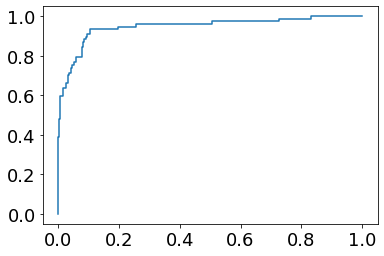

In [101]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# Print ROC curve -> 왼쪽 상단 모서리 끝에 가까울 수록 좋음!!
plt.plot(fpr,tpr)

# Print AUC -> 0과 1사이의 값을 갖으며, 그래프의 아래 면적의 넓이를 의미
auc = np.trapz(tpr,fpr)
print('AUC:', auc)



In [102]:
## difference 함수 이용해서 "Personal Loan","Experience",  "Mortgage" 제외한 변수들을 list로 묶는다
feature_columns = list(ploan_processed.columns.difference(["Personal Loan","Experience",  "Mortgage"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

In [103]:
train_x2, test_x2, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [104]:
model = sm.Logit(train_y, train_x2)
results2 = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131062
         Iterations 9


In [105]:
## "Experience",  "Mortgage" 제거한 모델
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1740
Method:                           MLE   Df Model:                            9
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                  0.6029
Time:                        10:23:39   Log-Likelihood:                -229.36
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                3.817e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0174      0.011      1.569      0.117      -0.004       0.039
CCAvg                  0.0997      0.062      1.596      0.111      -0.023       0.222
CD Account             4.3699      0.567      7.705      0.000       3.258       5.481
CreditCard            -1.2350      0.337     -3.668      0.000      -1.895      -0.575
Education              1.5249      0.187      8.156      0.000       1.158       1.891
Family                 0.7572      0.127      5.948      0.000       0.508       1.007
Income                 0.0546      0.004     12.833      0.000       0.046       0.063
Online                -0.4418      0.263     -1.678      0.093      -0.958       0.074
Securities Account    -1.8526      0.561     -3.302      0.001      -2.952      -0.753
const                -13.7465      1.164    -11.814      0.000     -16.027     -11.466
======================================================================================
"""

In [106]:
## 기존 모델(Experience",  "Mortgage" 제거 전)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                  0.6030
Time:                        10:24:10   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [107]:
pred_y = results2.predict(test_x2)

In [108]:
pred_Y = cut_off(pred_y,0.5)
pred_Y

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int32

In [109]:
## cfmat 정의
cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)

[[660  13]
 [ 29  48]]


In [110]:
## cfmat accuracy 계산
acc(cfmat)

0.944

In [111]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name='threshold'
table.columns.name='performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.932000
0.4,0.936000
0.5,0.944000
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC: 0.9465467667547905


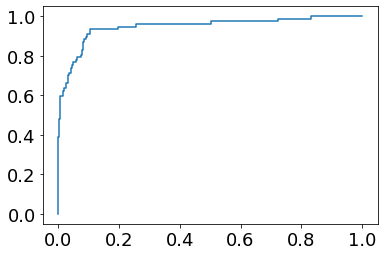

In [112]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)


# 변수선택법

In [113]:
## 전체 변수 다 넣은 모델
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

In [114]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [115]:
def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)])
            regr = model.fit()
            AIC = regr.aic
            return {"model":regr, "AIC":AIC}
        
'''
전진선택법
'''
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])


'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])


'''
단계적 선택법
'''
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [116]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Optimization terminated successfully.
         Current function value: 0.329986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.284217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296731
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329995
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.327824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.205738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324953
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.329912
  

In [117]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Optimization terminated successfully.
         Current function value: 0.137663
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.134821
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131859
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131061
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214795
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.142500
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131057
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.154241
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135440
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.152443
  

In [39]:
Stepwise_best_model = Stepwise_model(X=train_x,y=train_y)

Optimization terminated successfully.
         Current function value: 0.330076
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.329986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.284217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296731
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329995
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.327824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.205738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324953
  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.



         Current function value: 0.168897
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.154924
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.169073
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.169052
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.168642
         Iterations 9
Processed  9 models on 3 predictors in 0.06981372833251953
Selected predictors: ['Income', 'Education', 'CD Account', 'const']  AIC: 540.1423230958794
forward
Optimization terminated successfully.
         Current function value: 0.169107
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.185721
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.288940
         Iterations 7
Processed  3 models on 2 predictors in 0.02293872833251953
Sel

Optimization terminated successfully.
         Current function value: 0.131772
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131791
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131871
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.134831
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135444
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.142684
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.152482
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.155797
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.218281
         Iterations 8
Processed  9 models on 8 predictors in 0.07579827308654785
Selected predictors: ['

In [119]:
## 오류..? 19~20분 사이 results2 -> result2 변경해도 오류!
pred_y_full = result2.predict(test_x2) # full model
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

NameError: name 'result2' is not defined

In [120]:
pred_Y_full= cut_off(pred_y_full,0.5)
pred_Y_forward = cut_off(pred_y_forward,0.5)
pred_Y_backward = cut_off(pred_y_backward,0.5)
pred_Y_stepwise = cut_off(pred_y_stepwise,0.5)

In [121]:
cfmat_full = confusion_matrix(test_y, pred_Y_full)
cfmat_forward = confusion_matrix(test_y, pred_Y_forward)
cfmat_backward = confusion_matrix(test_y, pred_Y_backward)
cfmat_stepwise = confusion_matrix(test_y, pred_Y_stepwise)

ValueError: Found input variables with inconsistent numbers of samples: [750, 431]

## Lasso & Ridge

In [123]:
# 분석에 필요한 패키지 불러오기
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time

In [124]:
ploan = pd.read_csv("Personal Loan.csv")
ploan
'''
Experience 경력
Income 수입
Famliy 가족단위
CCAvg 월 카드사용량 
Education 교육수준 (1: undergrad; 2, Graduate; 3; Advance )
Mortgage 가계대출
Securities account 유가증권계좌유무
CD account 양도예금증서 계좌 유무
Online 온라인계좌유무
CreidtCard 신용카드유무 

'''

'\nExperience 경력\nIncome 수입\nFamliy 가족단위\nCCAvg 월 카드사용량 \nEducation 교육수준 (1: undergrad; 2, Graduate; 3; Advance )\nMortgage 가계대출\nSecurities account 유가증권계좌유무\nCD account 양도예금증서 계좌 유무\nOnline 온라인계좌유무\nCreidtCard 신용카드유무 \n\n'

In [125]:
# 의미없는 변수 제거
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'], axis=1, inplace=False)

In [126]:
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')
ploan_processed

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.0,46,22,70,4,1.9,1,212,0,0,0,0,1
2496,1.0,63,37,32,3,0.7,2,141,0,0,0,0,0
2497,1.0,33,9,14,3,0.9,3,114,0,0,0,0,0
2498,1.0,38,14,111,2,6.1,1,326,0,0,0,0,0


# 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터

In [127]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

In [128]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


# 로지스틱회귀모형 모델링 y = f(x)

In [129]:
model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131055
         Iterations 9


In [130]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                  0.6030
Time:                        10:35:11   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [131]:
# performance measure
print("model AIC: ","{:.5f}".format(results.aic))

model AIC:  482.69329


In [132]:
results.params

Age                    0.024471
CCAvg                  0.098468
CD Account             4.372577
CreditCard            -1.237447
Education              1.520329
Experience            -0.007032
Family                 0.757911
Income                 0.054695
Mortgage              -0.000133
Online                -0.440746
Securities Account    -1.852006
const                -13.920298
dtype: float64

In [133]:
## 나이가 한살 많을수록록 대출할 확률이 1.024 높다.
## 수입이 1단위 높을소룩 대출할 확률이 1.05배 높다 
## 가족 구성원수가 1많을수록 대출할 확률이 2.13배 높다
## 경력이 1단위 높을수록 대출할 확률이 0.99배 높다(귀무가설 채택)
# Experience,  Mortgage는 제외할 필요성이 있어보임
np.exp(results.params)

Age                   1.024773e+00
CCAvg                 1.103479e+00
CD Account            7.924761e+01
CreditCard            2.901239e-01
Education             4.573729e+00
Experience            9.929928e-01
Family                2.133814e+00
Income                1.056218e+00
Mortgage              9.998665e-01
Online                6.435563e-01
Securities Account    1.569221e-01
const                 9.005163e-07
dtype: float64

In [134]:
pred_y = results.predict(test_x)
pred_y

1065    0.012968
487     0.023841
2157    0.001210
1765    0.196245
525     0.006610
          ...   
277     0.019982
914     0.959460
542     0.005239
32      0.011344
2360    0.084464
Length: 750, dtype: float64

In [135]:
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y,0.5)
pred_Y

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int32

In [136]:
cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)

[[661  12]
 [ 28  49]]


In [137]:
(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat) ## accuracy

0.9466666666666667

In [138]:
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat) ## accuracy
    return(acc)

## 임계값(cut-off)에 따른 성능지표 비교


In [19]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name='threshold'
table.columns.name='performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


In [139]:
## 정확도가 높은 0.5~0.6 사이가 좋다!

AUC: 0.9463923891858513


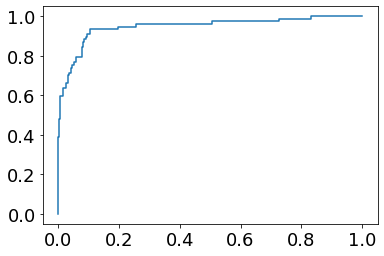

In [140]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)



In [141]:
## 두 개의 변수 제거한 모델 fitting (경력과 모기지 변수는  p-value가 비교적 높음) 
feature_columns = list(ploan_processed.columns.difference(["Personal Loan","Experience",  "Mortgage"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

In [142]:
train_x2, test_x2, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [143]:
model = sm.Logit(train_y, train_x2)
results2 = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131062
         Iterations 9


In [144]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1740
Method:                           MLE   Df Model:                            9
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                  0.6029
Time:                        10:37:23   Log-Likelihood:                -229.36
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                3.817e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0174      0.011      1.569      0.117      -0.004       0.039
CCAvg                  0.0997      0.062      1.596      0.111      -0.023       0.222
CD Account             4.3699      0.567      7.705      0.000       3.258       5.481
CreditCard            -1.2350      0.337     -3.668      0.000      -1.895      -0.575
Education              1.5249      0.187      8.156      0.000       1.158       1.891
Family                 0.7572      0.127      5.948      0.000       0.508       1.007
Income                 0.0546      0.004     12.833      0.000       0.046       0.063
Online                -0.4418      0.263     -1.678      0.093      -0.958       0.074
Securities Account    -1.8526      0.561     -3.302      0.001      -2.952      -0.753
const                -13.7465      1.164    -11.814      0.000     -16.027     -11.466
======================================================================================
"""

In [145]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                  0.6030
Time:                        10:37:24   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [146]:
pred_y = results2.predict(test_x2)

In [147]:
pred_Y = cut_off(pred_y,0.5)
pred_Y

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int32

In [148]:
cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)

[[660  13]
 [ 29  48]]


In [149]:
acc(cfmat) ## accuracy

0.944

In [150]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] =acc(cfmat)
table.index.name='threshold'
table.columns.name='performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.932000
0.4,0.936000
0.5,0.944000
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC: 0.9465467667547905


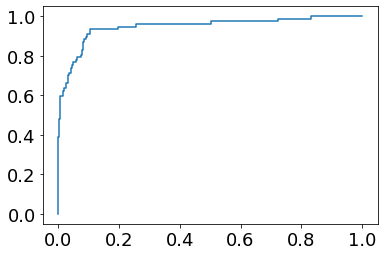

In [151]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)


# 변수선택법

In [152]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

In [153]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [154]:
def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)])
            regr = model.fit()
            AIC = regr.aic
            return {"model":regr, "AIC":AIC}
        
'''
전진선택법
'''
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])


'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])


'''
단계적 선택법
'''
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [155]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Optimization terminated successfully.
         Current function value: 0.329986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.284217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296731
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329995
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.327824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.205738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324953
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.329912
  

Optimization terminated successfully.
         Current function value: 0.131771
         Iterations 9
Processed  3 models on 9 predictors in 0.03603553771972656
Selected predictors: ['Income', 'Education', 'CD Account', 'Family', 'CreditCard', 'Securities Account', 'Online', 'CCAvg', 'Age', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x000001F25CB62BB0>
Optimization terminated successfully.
         Current function value: 0.131061
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131057
         Iterations 9
Processed  2 models on 10 predictors in 0.024024248123168945
Selected predictors: ['Income', 'Education', 'CD Account', 'Family', 'CreditCard', 'Securities Account', 'Online', 'CCAvg', 'Age', 'Mortgage', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x000001F25BA768E0>
Total elapsed time: 0.6225934028625488 seconds.


In [156]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Optimization terminated successfully.
         Current function value: 0.137663
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.134821
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131859
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131061
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214795
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.142500
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131057
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.154241
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135440
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.152443
  

In [157]:
Stepwise_best_model = Stepwise_model(X=train_x,y=train_y)

Optimization terminated successfully.
         Current function value: 0.330076
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.329986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.284217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296731
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329995
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.327824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.205738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324953
  

         Current function value: 0.136142
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.136574
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135928
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.133263
         Iterations 9
Processed  6 models on 6 predictors in 0.0650637149810791
Selected predictors: ['Income', 'Education', 'CD Account', 'Family', 'CreditCard', 'Securities Account', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x000001F25BA79CD0>
forward
Optimization terminated successfully.
         Current function value: 0.136599
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.137180
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.144927
         Iterations 9
Optimization terminated successfully.
         Cur

Optimization terminated successfully.
         Current function value: 0.142665
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.152478
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.155447
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.215827
         Iterations 8
Processed  10 models on 9 predictors in 0.11610937118530273
Selected predictors: ['Income', 'Education', 'CD Account', 'Family', 'CreditCard', 'Securities Account', 'Online', 'CCAvg', 'Age', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x000001F25BA73610>
backward
Total elapsed time: 1.6095402240753174 seconds.


In [158]:
pred_y_full = results2.predict(test_x2) # full model
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [159]:
pred_Y_full= cut_off(pred_y_full,0.5)
pred_Y_forward = cut_off(pred_y_forward,0.5)
pred_Y_backward = cut_off(pred_y_backward,0.5)
pred_Y_stepwise = cut_off(pred_y_stepwise,0.5)

In [160]:
cfmat_full = confusion_matrix(test_y, pred_Y_full)
cfmat_forward = confusion_matrix(test_y, pred_Y_forward)
cfmat_backward = confusion_matrix(test_y, pred_Y_backward)
cfmat_stepwise = confusion_matrix(test_y, pred_Y_stepwise)

In [161]:
print(acc(cfmat_full))
print(acc(cfmat_forward))
print(acc(cfmat_backward))
print(acc(cfmat_stepwise))


0.944
0.944
0.944
0.944


AUC: 0.9465467667547905


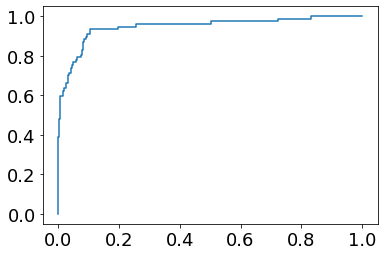

In [162]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_full, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.9465467667547905


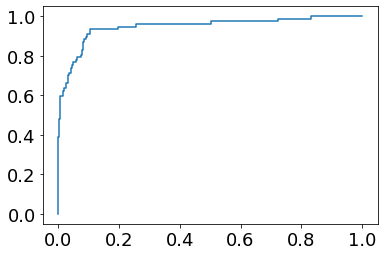

In [163]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_forward, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.9465467667547905


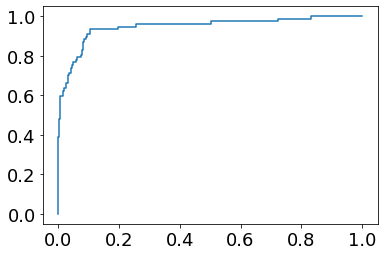

In [164]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_backward, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.9465467667547905


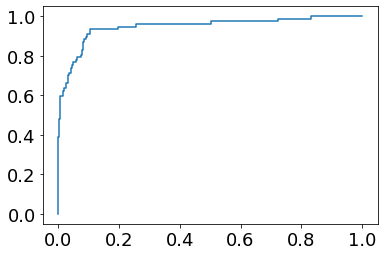

In [165]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_stepwise, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [166]:
###성능면에서는 네 모델이 큰 차이가 없음

# Lasso & RIdge

In [170]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [171]:
## 'ID','ZIP Code' 제거 후, Personal Loan을 y로, 나머지를 x
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'], axis=1, inplace=False)

feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 11) (750, 11) (1750,) (750,)


In [172]:
## lasso 적합 (알파값이 커지면 회구계수가 0에 가까워진다.)
ll =Lasso(alpha=0.01) 
ll.fit(train_x,train_y)


Lasso(alpha=0.01)

In [173]:
## 회귀계수 출력
ll.coef_

array([ 0.00000000e+00,  2.04783983e-03,  1.14390390e-01, -0.00000000e+00,
        6.58342418e-02,  4.76625359e-04,  3.13396711e-02,  3.55393865e-03,
        1.31719530e-05,  0.00000000e+00, -0.00000000e+00])

In [175]:
## lasso에서는 상수항 추가 없음
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                  0.6030
Time:                        10:41:18   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [176]:
pred_y_lasso = ll.predict(test_x) # full model
pred_Y_lasso= cut_off(pred_y_lasso,0.5)
cfmat = confusion_matrix(test_y, pred_Y_lasso)
print(acc(cfmat))


0.936


AUC: 0.9439995368672931


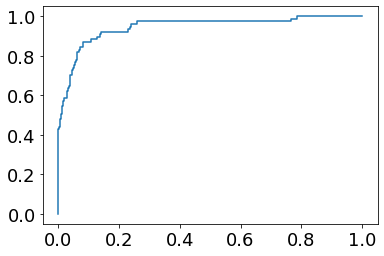

In [177]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_lasso, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [179]:
## Ridge 적합
rr =Ridge(alpha=0.01)
rr.fit(train_x,train_y)


Ridge(alpha=0.01)

In [181]:
## ridge 회귀계수 출력
rr.coef_ 

array([-3.71283678e-03,  7.37570775e-03,  3.54973975e-01, -5.28579506e-02,
        7.83404224e-02,  4.12823466e-03,  3.62504712e-02,  3.27385112e-03,
        1.73105480e-06, -1.91297381e-02, -8.77388670e-02])

In [183]:
## lasso 회귀계수 출력
ll.coef_ 

array([ 0.00000000e+00,  2.04783983e-03,  1.14390390e-01, -0.00000000e+00,
        6.58342418e-02,  4.76625359e-04,  3.13396711e-02,  3.55393865e-03,
        1.31719530e-05,  0.00000000e+00, -0.00000000e+00])

In [184]:
pred_y_ridge = rr.predict(test_x) 
pred_Y_ridge= cut_off(pred_y_ridge,0.5)
cfmat = confusion_matrix(test_y, pred_Y_lasso)
print(acc(cfmat))


0.936


AUC: 0.9494992377607533


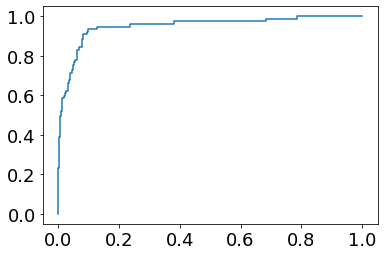

In [186]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_ridge, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [188]:
## 람다 값에 따른 회귀 계수 & acc 계산하기

## 알파값을 0.001~10까지의 범위로 설정
alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [189]:
data = []
acc_table=[]
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(train_x, train_y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
    pred_y = lasso.predict(test_x) # full model
    pred_y= cut_off(pred_y,0.5)
    cfmat = confusion_matrix(test_y, pred_y)
    acc_table.append((acc(cfmat)))
    

df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso
acc_table_lasso = pd.DataFrame(acc_table, index=alpha).T

In [190]:
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,-0.335006,-0.381869,-0.143698,-0.113103,0.102286
1,-0.002109,0.000000,0.000000,0.000000,-0.000000
2,0.006829,0.002048,0.000000,0.000000,0.000000
3,0.322174,0.114390,0.000000,0.000000,0.000000
4,-0.043385,-0.000000,-0.000000,-0.000000,-0.000000
5,0.076771,0.065834,0.000000,0.000000,0.000000
6,0.002534,0.000477,0.000000,0.000000,-0.000000
7,0.035728,0.031340,0.000000,0.000000,0.000000
8,0.003313,0.003554,0.003291,0.002893,0.000000
9,0.000004,0.000013,0.000016,0.000000,0.000000


In [191]:
## 회귀계수 증가할 수록 0으로 수렴

In [192]:
acc_table_lasso

,0.001,0.010,0.100,1.000,10.000
0,0.932,0.936,0.894667,0.897333,0.897333


In [193]:
## 0.01일 때 가장 정확함

In [194]:
data = []
acc_table=[]
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(train_x, train_y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
    pred_y = ridge.predict(test_x) # full model
    pred_y= cut_off(pred_y,0.5)
    cfmat = confusion_matrix(test_y, pred_y)
    acc_table.append((acc(cfmat)))

    
df_ridge = pd.DataFrame(data, index=alpha).T
acc_table_ridge = pd.DataFrame(acc_table, index=alpha).T

In [195]:
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,-0.289557,-0.289565,-0.289645,-0.290438,-0.297581
1,-0.003713,-0.003713,-0.003713,-0.003716,-0.003723
2,0.007376,0.007376,0.007376,0.007378,0.007388
3,0.355019,0.354974,0.354529,0.350141,0.311781
4,-0.052866,-0.052858,-0.052782,-0.052037,-0.045541
5,0.078340,0.078340,0.078341,0.078347,0.078316
6,0.004128,0.004128,0.004129,0.004136,0.004175
7,0.036250,0.036250,0.036254,0.036289,0.036578
8,0.003274,0.003274,0.003274,0.003278,0.003313
9,0.000002,0.000002,0.000002,0.000002,0.000004


In [196]:
acc_table_ridge

,0.001,0.010,0.100,1.000,10.000
0,0.932,0.932,0.932,0.932,0.932


In [198]:
## ㅣasso 와 달리 변화 없음

## labmda값의 변화에 따른 회귀계수 축소 시각화

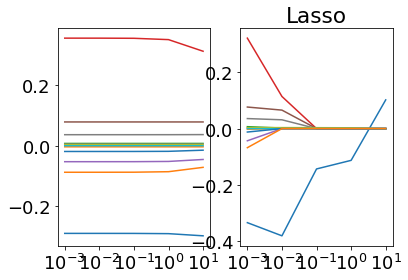

In [199]:
import matplotlib.pyplot as plt
ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha)

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha)
plt.title("Lasso")

plt.show()

In [200]:
## ridge는 일반적이지 않은 양상을 보이고, lasso는 0으로 수렴하는 일반적인 양상을 보임